# The Final Self-defined Project for The IBM Data Science Courses

## Self defined projects details

Basically I will talk about two parts:

1. The project backgrounds;

2. The data I used and will be used (inclusing the data from online and some self generated dataframes or tables);

### Hopefully this will be a very interesting projects!

*****

### 1. Project Background

Since I live in southern California for a while, and always travelling to the northen California, I have found a lot of differences between these two places. Not only from the part of the weather, the landscape, the company types, but also the life styles of peoples. All these factors influence each other dramatically. 

Currently, my identity is still a graduate student. So for this project, I will do something based on the university or colleges. Meawhile, exploring the neighborhood of the universities adn try to cluter those neighborhood. Hopefully, it will help the incoming students to chose their deam school or find the best place for them to study. 

**A risen question would be that why I select this topic during my studies**

*Based on different location of the universities or the colleges*, I find that the location of the school will stimulate the development of certain fields and sometimes it will also impact the Businesses around.

For example:

1. University of Southern California (USC) has the No.1 Cinema College around US. The location of the USC is close to the Hollywood.

2. The location of the University of California, Riverside (UCR) determined its climate at that area. And we can fined lots of reseraches on the oranges inside school. And UCR has the famous Department of Botany and Plant Science.

3. UC san diego (UCSD) has very good biology-related research center or reserach directions. Thus it stimulate the biology companies in hat area.

....

##### So here, we will explore theneighborhood of each university in california to see weather it will provide us with useful infomations or other interesting discoveries.

****

### 2. About the original data

1. We will basically use the Foursquare app (developer version) to get the neighborhood locations and some other related infomations;

2. The list of the university in California will be grabed from the web: http://www.free-4u.com/Colleges/California-Colleges.html.

#### Following I will grab the data and do some preprocessings of the dataframe and get the location of each universities in california and try to analyze some useful (I think it would be useful) infomation from these universities.

****

In [7]:
#Load the neede python environment
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv

print("All above libraries have been loaded!")

All above libraries have been loaded!


In [8]:
# Grab the info from the web  http://www.free-4u.com/Colleges/California-Colleges.html.
# And get the list of the universities and colleges in California
# Transfer the tabel to a dataframe for the following explorations

url='http://www.free-4u.com/Colleges/California-Colleges.html'
page=requests.get(url).text

soup=BeautifulSoup(page, 'html.parser')
#print(soup)

In [9]:
# Find the tables in the soup
table=soup.find('table')
results=table.find_all('tr')

#How many lines in the table giving the needed data
print('Number of results', len(results)) #from the web we known that the data points should be 264, so the result should be 265
#print(results)

Number of results 265


In [10]:
#Creating the needed dataframe
#From the web, we know that there are basically 5 columns
# ['School', 'City', 'Enroll','In-State Cost','Out-State Cost']

University=[]
City=[]
Enroll=[]
InStateCost=[]
OutStateCost=[]

for result in results:
    data=result.find_all('td')
    i=0
    for cell in data:
        text=cell.getText()
        text=text.strip('\n')
        if i == 0:
            University.append(text)
            i=i+1
        elif i == 1:
            City.append(text)
            i=i+1
        elif i == 2:
            text=text.replace(',','')
            Enroll.append(text)
            i=i+1
        elif i == 3:
            text=text.replace(',','')
            text=text.replace('$','')
            InStateCost.append(text)
            i=i+1
        elif i == 4:
            text=text.replace(',','')
            text=text.replace('$','')
            OutStateCost.append(text)
        else:
            print('Something Wrong Happend! Please check!')
            
data_UCal_dic={'University':University,'City':City,'Enroll':Enroll,'InStateCost_doller':InStateCost,'OutStateCost_doller':OutStateCost}
data_UCal=pd.DataFrame.from_dict(data_UCal_dic)

data_UCal.head()

,University,City,Enroll,InStateCost_doller,OutStateCost_doller
0,Academy for Jewish Religion-California,Los Angeles,74,-,-
1,Academy of Art University,San Francisco,18535,38806.00,38806.00
2,Academy of Chinese Culture and Health Sciences,Oakland,149,-,-
3,Academy of Couture Art,Beverly Hills,32,24738.00,24738.00
4,Acupuncture and Integrative Medicine College-B...,Berkeley,161,-,-


In [11]:
#Check the size of the Dataframe and make sure it is the right one you need
data_UCal.shape  #shoube 264 rows and 5 columns

(264, 5)

In [12]:
# check the type of each colomn data
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
University             264 non-null object
City                   264 non-null object
Enroll                 264 non-null object
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: object(5)
memory usage: 10.4+ KB


In [13]:
#Combine the University column and the City column
data_UCal['University_location']=data_UCal['University']+', '+data_UCal['City']
data_UCal.insert(2, 'University_location', data_UCal.pop(data_UCal.columns[-1]))
data_UCal.head()
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
University             264 non-null object
City                   264 non-null object
University_location    264 non-null object
Enroll                 264 non-null object
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: object(6)
memory usage: 12.5+ KB


In [14]:
#We want to find the school with more than 5000 enrollment
data_UCal['Enroll']=data_UCal['Enroll'].astype(int)
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
University             264 non-null object
City                   264 non-null object
University_location    264 non-null object
Enroll                 264 non-null int32
InStateCost_doller     264 non-null object
OutStateCost_doller    264 non-null object
dtypes: int32(1), object(5)
memory usage: 11.4+ KB


In [15]:
data_Ucal=data_UCal[data_UCal['Enroll']>=5000]
#Obtain the In-state-cost and Out-state-cost both larger than $10000
data_Ucal['InStateCost_doller']=data_Ucal['InStateCost_doller'].astype(float)
data_Ucal['OutStateCost_doller']=data_Ucal['OutStateCost_doller'].astype(float)
data_Ucal=data_Ucal[data_Ucal['InStateCost_doller']>=10000]
data_Ucal=data_Ucal[data_Ucal['OutStateCost_doller']>=10000]
data_Ucal.reset_index(drop=True, inplace=True)

print(data_Ucal.shape)
data_Ucal.head(10)

(53, 6)


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",18535,38806.0,38806.0
1,Ashford University,San Diego,"Ashford University, San Diego",107170,21887.0,21887.0
2,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",10686,46992.0,46992.0
3,Biola University,La Mirada,"Biola University, La Mirada",6738,48174.0,48174.0
4,Brandman University,Irvine,"Brandman University, Irvine",11999,13952.0,13952.0
5,California Baptist University,Riverside,"California Baptist University, Riverside",9278,43324.0,43324.0
6,California Polytechnic State University-San Lu...,San Luis Obispo,California Polytechnic State University-San Lu...,20916,24683.0,35843.0
7,California State Polytechnic University-Pomona,Pomona,California State Polytechnic University-Pomona...,25000,23953.0,35113.0
8,California State University-Bakersfield,Bakersfield,"California State University-Bakersfield, Baker...",10319,22299.0,33459.0
9,California State University-Channel Islands,Camarillo,"California State University-Channel Islands, C...",6350,25273.0,36433.0


**Before we explore the data provided for each of university in california**

We first get a clean data for the following Neighborhood explorations, we name the dataframe "data_UCal_exploration".

In [16]:
#drop Enroll, InStateCost and OutStateCost
data_Ucal_exploration=data_Ucal.drop(['Enroll','InStateCost_doller','OutStateCost_doller'], axis=1)
data_Ucal_exploration.head()

#Grab the latitude and the longitude info from the library
from geopy.geocoders import Nominatim

def lati_longi(address):
    geolocator = Nominatim(user_agent="user_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

#Calfornia
Address_CA='Los Angeles'
Lati_CA, Longi_CA=lati_longi(Address_CA)
print('The geograpical coordinate of {} are {}, {}.\n'.format(Address_CA,Lati_CA,Longi_CA))

#Each school listed in the datafram
Latitude_U=[]
Longitude_U=[]

for address in list(data_Ucal_exploration['University']):
    print(address)
    lati, longi = lati_longi(address)
    Latitude_U.append(lati)
    Longitude_U.append(longi)

data_Ucal_exploration['Latitude']=Latitude_U
data_Ucal_exploration['Longitude']=Longitude_U

#This is the datafarme we will used for the new week explorations
data_Ucal_exploration.head()

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.

Academy of Art University
Ashford University
Azusa Pacific University
Biola University
Brandman University
California Baptist University
California Polytechnic State University-San Luis Obispo
California State Polytechnic University-Pomona
California State University-Bakersfield
California State University-Channel Islands
California State University-Chico
California State University-Dominguez Hills
California State University-East Bay
California State University-Fresno
California State University-Fullerton
California State University-Long Beach
California State University-Los Angeles
California State University-Monterey Bay
California State University-Northridge
California State University-Sacramento
California State University-San Bernardino
California State University-San Marcos
California State University-Stanislaus
Chapman University
Concordia University-Irvine
DeVry University-California
Humboldt State Univer

,University,City,University_location,Latitude,Longitude
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",37.787898,-122.400549
1,Ashford University,San Diego,"Ashford University, San Diego",-34.942019,138.590713
2,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",34.130459,-117.887965
3,Biola University,La Mirada,"Biola University, La Mirada",33.906387,-118.015132
4,Brandman University,Irvine,"Brandman University, Irvine",47.061504,-122.768741


In [17]:
print(data_Ucal_exploration.shape)
data_Ucal_exploration.info()

# Check errors (Sometimes the geolocator does not have the info about the university location and sometimes it may locate it to other countries)
# Here, we try to grab the right California location and frop the one in other countries (I don't know what happened, but just firstly, use this way t clean the data. Update will be guaranteed in the future.)
True_data=data_Ucal_exploration[(data_Ucal_exploration['Latitude']<=(Lati_CA+10)) & (data_Ucal_exploration['Latitude']>=(Lati_CA-10)) & (data_Ucal_exploration['Longitude']<=(Longi_CA+10)) & (data_Ucal_exploration['Longitude']>=(Longi_CA-10))]
print('True(Right) data shape should be {}. \n'.format(True_data.shape))

True_data.reset_index(inplace=True, drop=True)
True_data.head()

(53, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
University             53 non-null object
City                   53 non-null object
University_location    53 non-null object
Latitude               53 non-null float64
Longitude              53 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB
True(Right) data shape should be (49, 5). 



,University,City,University_location,Latitude,Longitude
0,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",37.787898,-122.400549
1,Azusa Pacific University,Azusa,"Azusa Pacific University, Azusa",34.130459,-117.887965
2,Biola University,La Mirada,"Biola University, La Mirada",33.906387,-118.015132
3,California Baptist University,Riverside,"California Baptist University, Riverside",33.928324,-117.425924
4,California Polytechnic State University-San Lu...,San Luis Obispo,California Polytechnic State University-San Lu...,35.307462,-120.664648


**Let us make a map of all the university locations in this dataframe**

In [56]:
#Loading the needed map
import folium

# create map of toronto
map_CA = folium.Map(location=[Lati_CA, Longi_CA], zoom_start=5, tiles='Stamen Terrain')

# add markers to map
for lat, lng, label in zip(True_data['Latitude'], True_data['Longitude'], True_data['University_location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3126cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CA)  
    
map_CA

**From this plot, we can find that:**

1. Most of the universities/colleges gathered intwo parts, The Bay area, and the grater Los Angeles area.

2. Most located close to the coast or in the middle of california, no schools are found in the east of CA.

3. More schools can be found when it is close to the larger city, Like San Francisco, Los Angeles, San Diego, etc.

### This data set will be used for the next week Neighborhood explorations surrounding the universities.

In [57]:
# Save the data as "CA_U_location.csv"
True_data.to_csv('CA_U_location.csv')

#### Fot the Next week, we will apply the Foursquare data to explore the neighborhood surrounding each listed universities in California. And try to cluster them.

*****
*****

# Explorations on the dataframe of "data_UCal"

Hopefully, we can find something interesting


In [58]:
# Lets neglect some missing data for the In-state Cost and Out-state Cost for some schools
data_UCal.drop(data_UCal[data_UCal['InStateCost_doller']=='-'].index, axis=0, inplace=True)
print(data_UCal.shape)
data_UCal.drop(data_UCal[data_UCal['OutStateCost_doller']=='-'].index, axis=0, inplace=True)
print(data_UCal.shape)

(192, 7)
(192, 7)


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [59]:
# Transfor the object to float for InStateCost and OutStateCost
data_UCal['InStateCost_doller']=data_UCal['InStateCost_doller'].astype(float)
data_UCal['OutStateCost_doller']=data_UCal['OutStateCost_doller'].astype(float)
data_UCal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 262
Data columns (total 7 columns):
University             192 non-null object
City                   192 non-null object
University_location    192 non-null object
Enroll                 192 non-null int32
InStateCost_doller     192 non-null float64
OutStateCost_doller    192 non-null float64
CostDiff_doller        192 non-null float64
dtypes: float64(3), int32(1), object(3)
memory usage: 11.2+ KB


In [60]:
#Observe the dataframe
data_UCal.head()

,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller
1,Academy of Art University,San Francisco,"Academy of Art University, San Francisco",18535,38806.0,38806.0,0.0
3,Academy of Couture Art,Beverly Hills,"Academy of Couture Art, Beverly Hills",32,24738.0,24738.0,0.0
5,Alliant International University-San Diego,San Diego,"Alliant International University-San Diego, Sa...",4986,31522.0,31522.0,0.0
9,American Conservatory Theater,San Francisco,"American Conservatory Theater, San Francisco",114,26201.0,26201.0,0.0
11,American Jewish University,Los Angeles,"American Jewish University, Los Angeles",212,49121.0,49121.0,0.0


In [61]:
#We need to know the differentce between the InStateCost and OutStateCost
#Usually, the OutStateCost will be larger than the InStateCost
data_UCal['CostDiff_doller']=data_UCal['OutStateCost_doller']-data_UCal['InStateCost_doller']
data_diff=data_UCal[['University','City','CostDiff_doller']]

#Find the one that the InState and OutState Cost different not equal to 0
data_Non_0_diff=data_diff[data_diff['CostDiff_doller']!=0.0]
data_Non_0_diff.reset_index(inplace=True, drop=True)
print(data_Non_0_diff.shape)
data_Non_0_diff

(32, 3)


,University,City,CostDiff_doller
0,California Polytechnic State University-San Lu...,San Luis Obispo,11160.0
1,California State Polytechnic University-Pomona,Pomona,11160.0
2,California State University-Bakersfield,Bakersfield,11160.0
3,California State University-Channel Islands,Camarillo,11160.0
4,California State University-Chico,Chico,11160.0
5,California State University-Dominguez Hills,Carson,11160.0
6,California State University-East Bay,Hayward,11160.0
7,California State University-Fresno,Fresno,11160.0
8,California State University-Fullerton,Fullerton,11160.0
9,California State University-Long Beach,Long Beach,11160.0


#### Results can be found from the above results

**1. From the above result, the largest difference between the In-State-Cost and Out-State-Cost are all from the 10 campus from University of California (Mianly the public university).**

**2. Also, we found differences bettwen the In-State-Cost and Out-State-Cost in many state universities, and the difference is almost the half of that from hte University of California.**

## Sort values by the City, and the Enroll number

In [62]:
data_GY_City=data_UCal.sort_values(by=['City','Enroll'])
data_GY_City

,University,City,University_location,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller
20,Argosy University-San Francisco Bay Area,Alameda,"Argosy University-San Francisco Bay Area, Alameda",547,14663.0,14663.0,0.0
149,Platt College-Los Angeles,Alhambra,"Platt College-Los Angeles, Alhambra",1075,15835.0,15835.0,0.0
179,Soka University of America,Aliso Viejo,"Soka University of America, Aliso Viejo",423,44550.0,44550.0,0.0
27,Bethesda University,Anaheim,"Bethesda University, Anaheim",399,10320.0,10320.0,0.0
63,California University of Management and Sciences,Anaheim,California University of Management and Scienc...,561,9930.0,9930.0,0.0
183,Southern California Institute of Technology,Anaheim,"Southern California Institute of Technology, A...",808,19330.0,19330.0,0.0
181,South Baylo University,Anaheim,"South Baylo University, Anaheim",901,7950.0,7950.0,0.0
254,Westwood College-Anaheim,Anaheim,"Westwood College-Anaheim, Anaheim",935,18274.0,18274.0,0.0
249,West Coast University-Orange County,Anaheim,"West Coast University-Orange County, Anaheim",2163,34345.0,34345.0,0.0
142,Pacific Union College,Angwin,"Pacific Union College, Angwin",1996,40521.0,40521.0,0.0


**We found that we have more than one university in certain cities**

So, let us calculate the student enrollment number for each city

In [63]:
data_sum_enroll=data_GY_City.groupby(['City'])['Enroll'].sum()
enroll_num_City=pd.DataFrame(data=data_sum_enroll)
enroll_num_City.sort_values(by=['Enroll'], ascending=False, inplace=True)
enroll_num_City.reset_index(inplace=True)
enroll_num_City.head(10)

,City,Enroll
0,San Diego,168664
1,Los Angeles,153218
2,San Francisco,73895
3,La Jolla,61622
4,Irvine,49978
5,Fullerton,43639
6,Northridge,42183
7,Berkeley,40514
8,Long Beach,39242
9,Davis,36771


#### From the above results

**1. The top 10 cities that have the most student enrollment are**

*San Diego*,  SoCal

*Los Angeles*,  SoCal

*San Francisco*,  NoCal

*La Jolla*,  SoCal

*Irvine*,  SoCal

*Fullerton*,  SoCal

*Northridge*,  SoCal

*Berkeley*,  NoCal

*Long Beach*,  SoCal

*Davis*,  NoCal


## Try to correlate the enrollment number and the In-State-Cost

In [64]:
#Load the needed Python environment for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

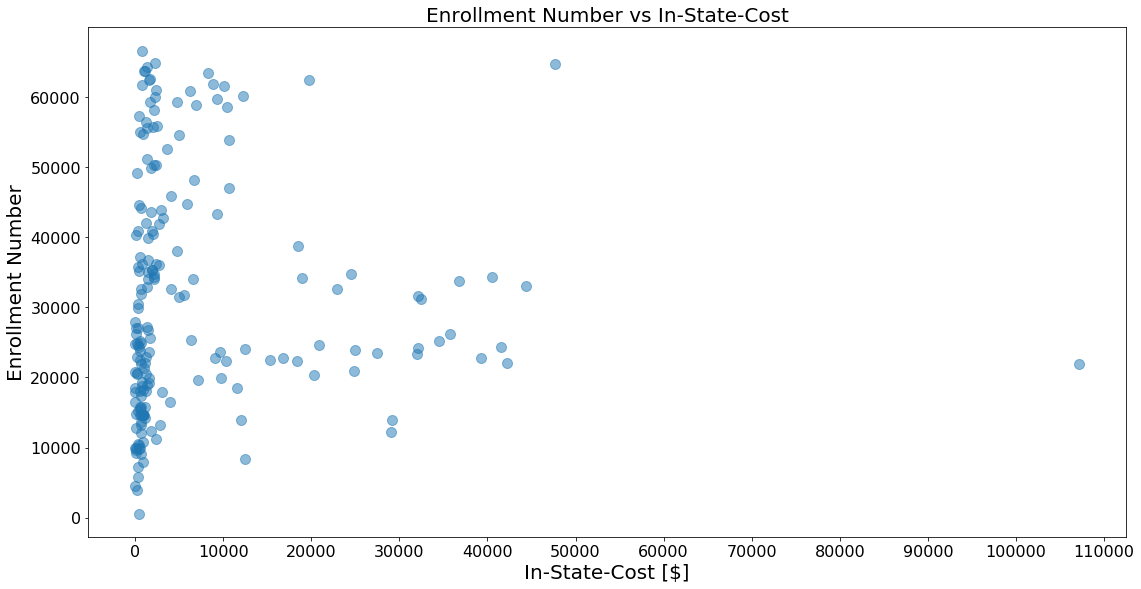

In [81]:
plt.figure(figsize=(16,8))

plt.scatter(data_GY_City['Enroll'],data_GY_City['InStateCost_doller'],marker='o',s=100,alpha=0.5)
plt.ylabel('Enrollment Number', fontsize=20)
plt.xlabel('In-State-Cost [$]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yticks(np.arange(0,70000,10000))
plt.xticks(np.arange(0,120000, 10000))
plt.tight_layout()
plt.title('Enrollment Number vs In-State-Cost', fontsize=20)
plt.show()


**From the above plot, we find that most of the school, the In-State-Cost os lower thatn 20,000 dollers. And we noticed that one point of the In-State-Cost value is close to 110,000 dollers.**